In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist
from scipy import stats

# 1. "Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení"

## Načtení datového souboru

In [2]:
df_data = pd.read_csv('case0102.csv')

In [3]:
df_data

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female
...,...,...
88,6600,Male
89,6840,Male
90,6900,Male
91,6900,Male


## Rozdělení na dvě pozorované skupiny

In [4]:
df_female = df_data[df_data['Sex'] == 'Female']
df_female

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female
...,...,...
56,6000,Female
57,6000,Female
58,6120,Female
59,6300,Female


In [5]:
df_male = df_data[df_data['Sex'] == 'Male']
df_male

,Salary,Sex
61,4620,Male
62,5040,Male
63,5100,Male
64,5100,Male
65,5220,Male
66,5400,Male
67,5400,Male
68,5400,Male
69,5400,Male
70,5400,Male


In [6]:
male_sal = df_male['Salary']
male_sal 

61    4620
62    5040
63    5100
64    5100
65    5220
66    5400
67    5400
68    5400
69    5400
70    5400
71    5700
72    6000
73    6000
74    6000
75    6000
76    6000
77    6000
78    6000
79    6000
80    6000
81    6000
82    6000
83    6000
84    6000
85    6300
86    6600
87    6600
88    6600
89    6840
90    6900
91    6900
92    8100
Name: Salary, dtype: int64

In [7]:
female_sal = df_female['Salary']
female_sal

0     3900
1     4020
2     4290
3     4380
4     4380
      ... 
56    6000
57    6000
58    6120
59    6300
60    6300
Name: Salary, Length: 61, dtype: int64

## Popis dat a zkoumaného problému

Popis

## Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

### Střední hodnota

In [8]:
print(f'Male střední hodnotu: {np.mean(male_sal):.0f}')
print(f'Female střední hodnotu: {female_sal.mean():.0f}')

Male střední hodnotu: 5957
Female střední hodnotu: 5139


### Rozptyl

In [9]:
print(f'Male rozptyl: {male_sal.var():.0f}')
print(f'Female rozptyl: {female_sal.var():.0f}')

Male rozptyl: 477112
Female rozptyl: 291460


### Medián

In [10]:
print(f'Male medián: {male_sal.median():.0f}')
print(f'Female medián: {female_sal.median():.0f}')

Male medián: 6000
Female medián: 5220


# 2. Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

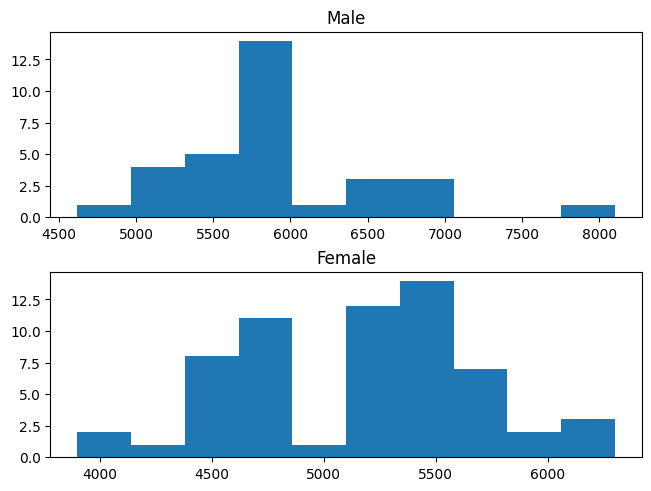

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10)
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10)
ax2.set_title("Female")

plt.show()

## Uděláme hustoty pomoci normalizace

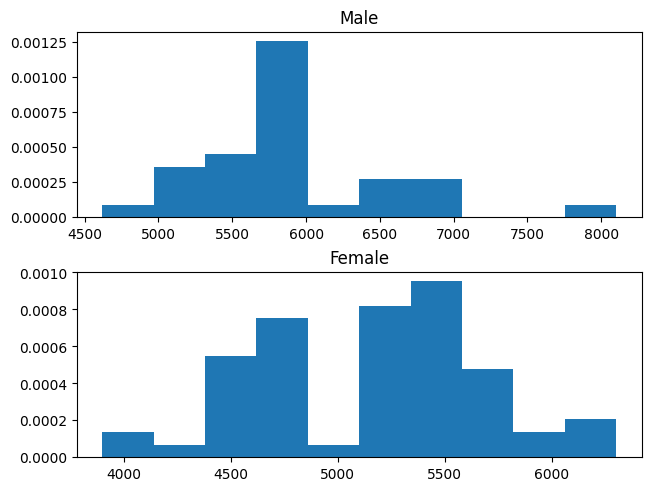

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10, density=True)
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10, density=True)
ax2.set_title("Female")

plt.show()

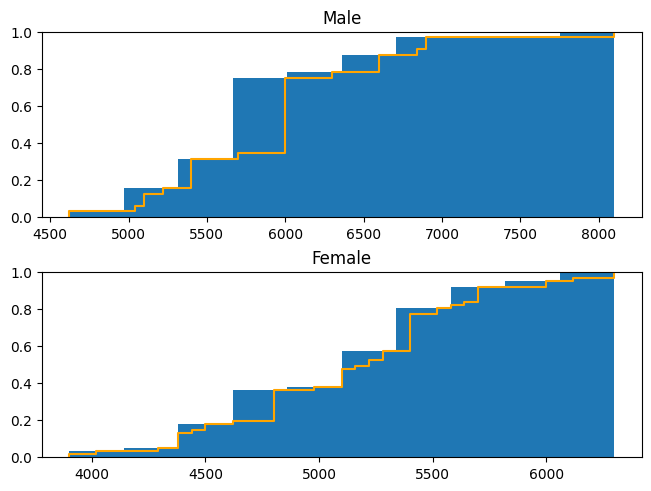

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10, density=True, cumulative=True)
ax1.ecdf(x=male_sal, color='orange')
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10, density=True, cumulative=True)
ax2.ecdf(x=female_sal, color='orange')
ax2.set_title("Female")

plt.show()

# 3. Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

## Normální rozdělení pro muže a ženy

In [14]:
m_norm_mean_hat, m_norm_std_dev_hat = stats.norm.fit(male_sal)
print(f'Male: {m_norm_mean_hat:.0f}, {m_norm_std_dev_hat:.0f}')

f_norm_mean_hat, f_norm_std_dev_hat = stats.norm.fit(female_sal)
print(f'Female: {f_norm_mean_hat:.0f}, {f_norm_std_dev_hat:.0f}')

Male: 5957, 680
Female: 5139, 535


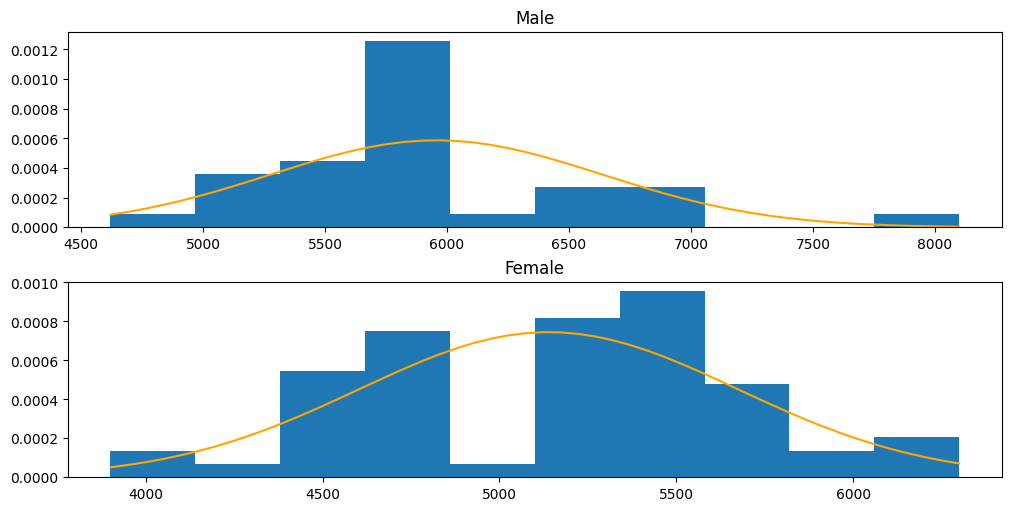

In [15]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.norm.pdf(x=m_x_values, loc=m_norm_mean_hat, scale=m_norm_std_dev_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.norm.pdf(x=f_x_values, loc=f_norm_mean_hat, scale=f_norm_std_dev_hat),
    color="orange"
)
ax2.set_title("Female")

plt.show()

## Exponenciální rozdělení pro muže a ženy

In [16]:
m_expon_loc_hat, m_expon_scale_hat = stats.expon.fit(male_sal)
print(f'Male: {m_expon_loc_hat:.0f}, {m_expon_scale_hat:.0f}')

f_expon_loc_hat, f_expon_scale_hat = stats.expon.fit(female_sal)
print(f'Female: {f_expon_loc_hat:.0f}, {f_expon_scale_hat:.0f}')

Male: 4620, 1337
Female: 3900, 1239


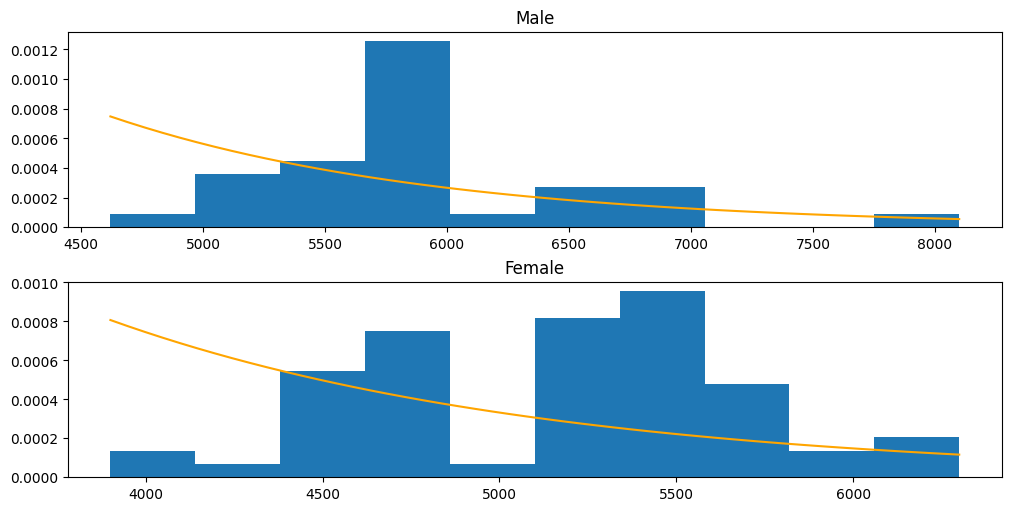

In [17]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.expon.pdf(x=m_x_values, loc=m_expon_loc_hat, scale=m_expon_scale_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.expon.pdf(x=f_x_values, loc=f_expon_loc_hat, scale=f_expon_scale_hat),
    color="orange"
)
ax2.set_title("Female")

plt.show()

## Uniformní rozdělení pro muže a ženy

In [18]:
m_uniform_a_hat, m_uniform_b_hat = stats.uniform.fit(male_sal)
print(f'Male: {m_uniform_a_hat:.0f}, {m_uniform_b_hat:.0f}')

f_uniform_a_hat, f_uniform_b_hat = stats.uniform.fit(female_sal)
print(f'Female: {f_uniform_a_hat:.0f}, {f_uniform_b_hat:.0f}')

Male: 4620, 3480
Female: 3900, 2400


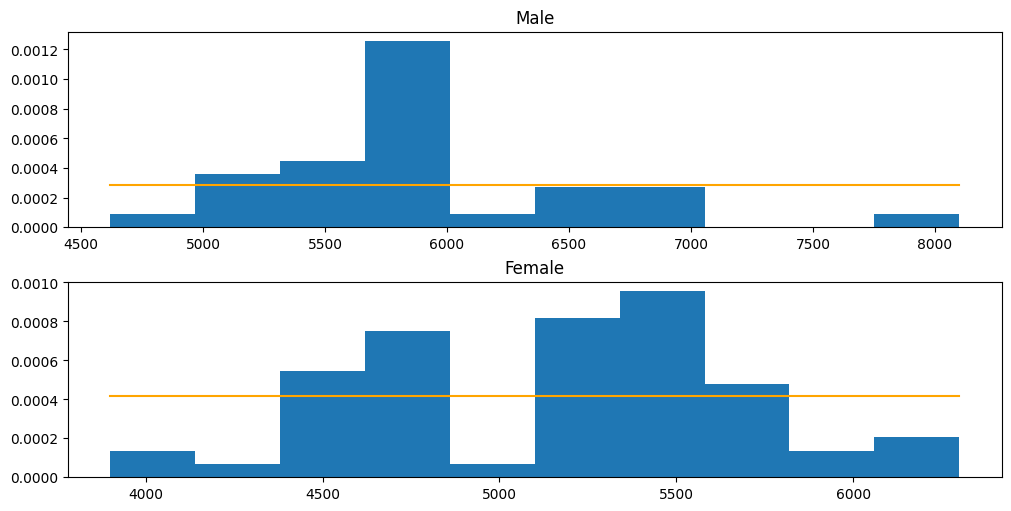

In [19]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.uniform.pdf(x=m_x_values, loc=m_uniform_a_hat, scale=m_uniform_b_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.uniform.pdf(x=f_x_values, loc=f_uniform_a_hat, scale=f_uniform_b_hat),
    color="orange"
)
ax2.set_title("Female")

plt.show()

# 4. Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

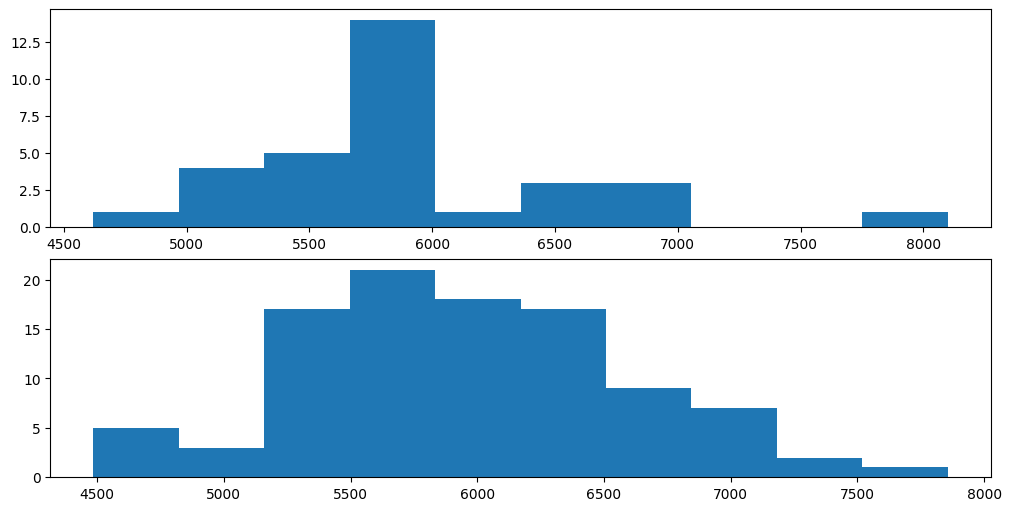

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5))
m_x_simulated = stats.norm.rvs(loc=m_norm_mean_hat, scale=m_norm_std_dev_hat, size=100)
ax1.hist(male_sal, bins=10)
ax2.hist(m_x_simulated, bins=10)

plt.show()

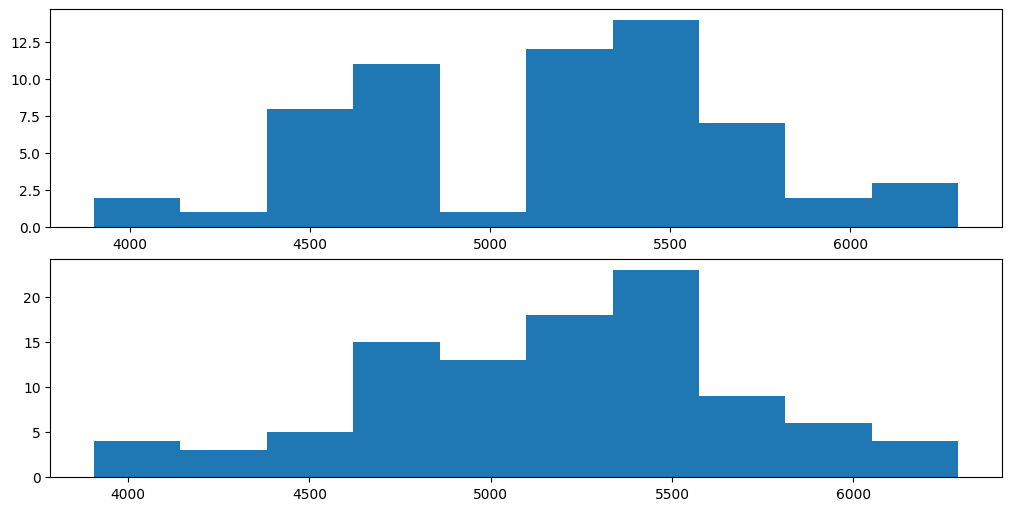

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5))
f_x_simulated = stats.norm.rvs(loc=f_norm_mean_hat, scale=f_norm_std_dev_hat, size=100)
ax1.hist(female_sal, bins=10)
ax2.hist(f_x_simulated, bins=10)

plt.show()

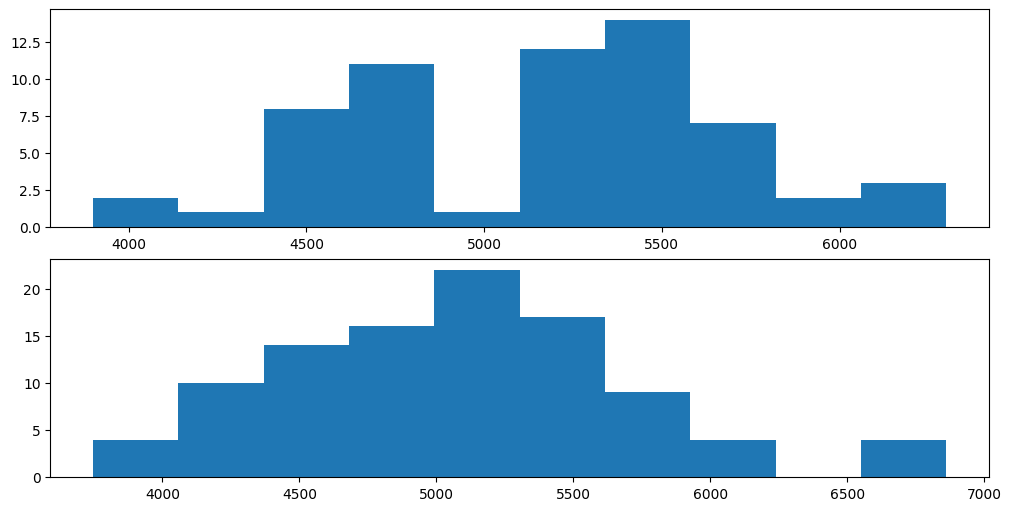

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5))
f_x_simulated = stats.norm.rvs(loc=f_norm_mean_hat, scale=f_norm_std_dev_hat, size=100)
ax1.hist(female_sal, bins=10)
ax2.hist(f_x_simulated, bins=10)

plt.show()

# 5. Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [23]:
# Pro zeny
confidence_interval_female = stats.t.interval(0.95, len(female_sal) - 1, loc=np.mean(female_sal), scale=stats.sem(female_sal))

lower_bound_f, upper_bound_f = confidence_interval_female

confidence_interval_male = stats.t.interval(0.95, len(male_sal) - 1, loc=np.mean(male_sal), scale=stats.sem(male_sal))

lower_bound_m, upper_bound_m = confidence_interval_male

print(f'Oboustranný 95% konfidenční interval mužů ({lower_bound_m:.0f},{upper_bound_m:.0f}) pro střední hodnotu.')
print(f'Oboustranný 95% konfidenční interval žen ({lower_bound_f:.0f},{upper_bound_f:.0f}) pro střední hodnotu.')

Oboustranný 95% konfidenční interval mužů (5708,6206) pro střední hodnotu.
Oboustranný 95% konfidenční interval žen (5001,5277) pro střední hodnotu.
